## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [260]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#importing pandas to read csv file
# Your code here - remember to use markdown cells for comments as well!

In [261]:
kcdf = pd.read_csv('../data/kc_house_data.csv')
#dataset

In [262]:
kcdf = kcdf.drop(columns = 'date')

In [263]:
kcdf = kcdf.dropna()

In [264]:
kcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [265]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [266]:
kcdf['zip_code'] = kcdf['address'].apply(lambda x: zip_code(x))

In [267]:
kcdf['zip_code'] = kcdf['zip_code'].astype(int)

In [268]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

In [269]:
realkcdf = kcdf[(kcdf['zip_code'] >= 98000) & (kcdf['zip_code'] < 99000)]

In [270]:
realkcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [271]:
realkcdf['zip_code'].nunique()

88

In [8]:
#am_cords = (47.615722, -122.339494)

In [9]:
#kcdf['location'] = list(zip(kcdf.lat, kcdf.long))

In [10]:
#kcdf['distance_to_amazon'] = kcdf['location'].apply(lambda x: geodesic(x, am_cords).miles)

In [11]:
#closekcdf = kcdf[kcdf['distance_to_amazon'] <= 10]

In [95]:
#closekcdf

In [93]:
#q1 = closekcdf['price'].quantile(.25)
#q3 = closekcdf['price'].quantile(.75)
#IQR = q3 - q1
#outliers = closekcdf[((closekcdf['price']<(q1-1.5*IQR)) | (closekcdf['price']>(q3+1.5*IQR)))]

In [94]:
#outliers

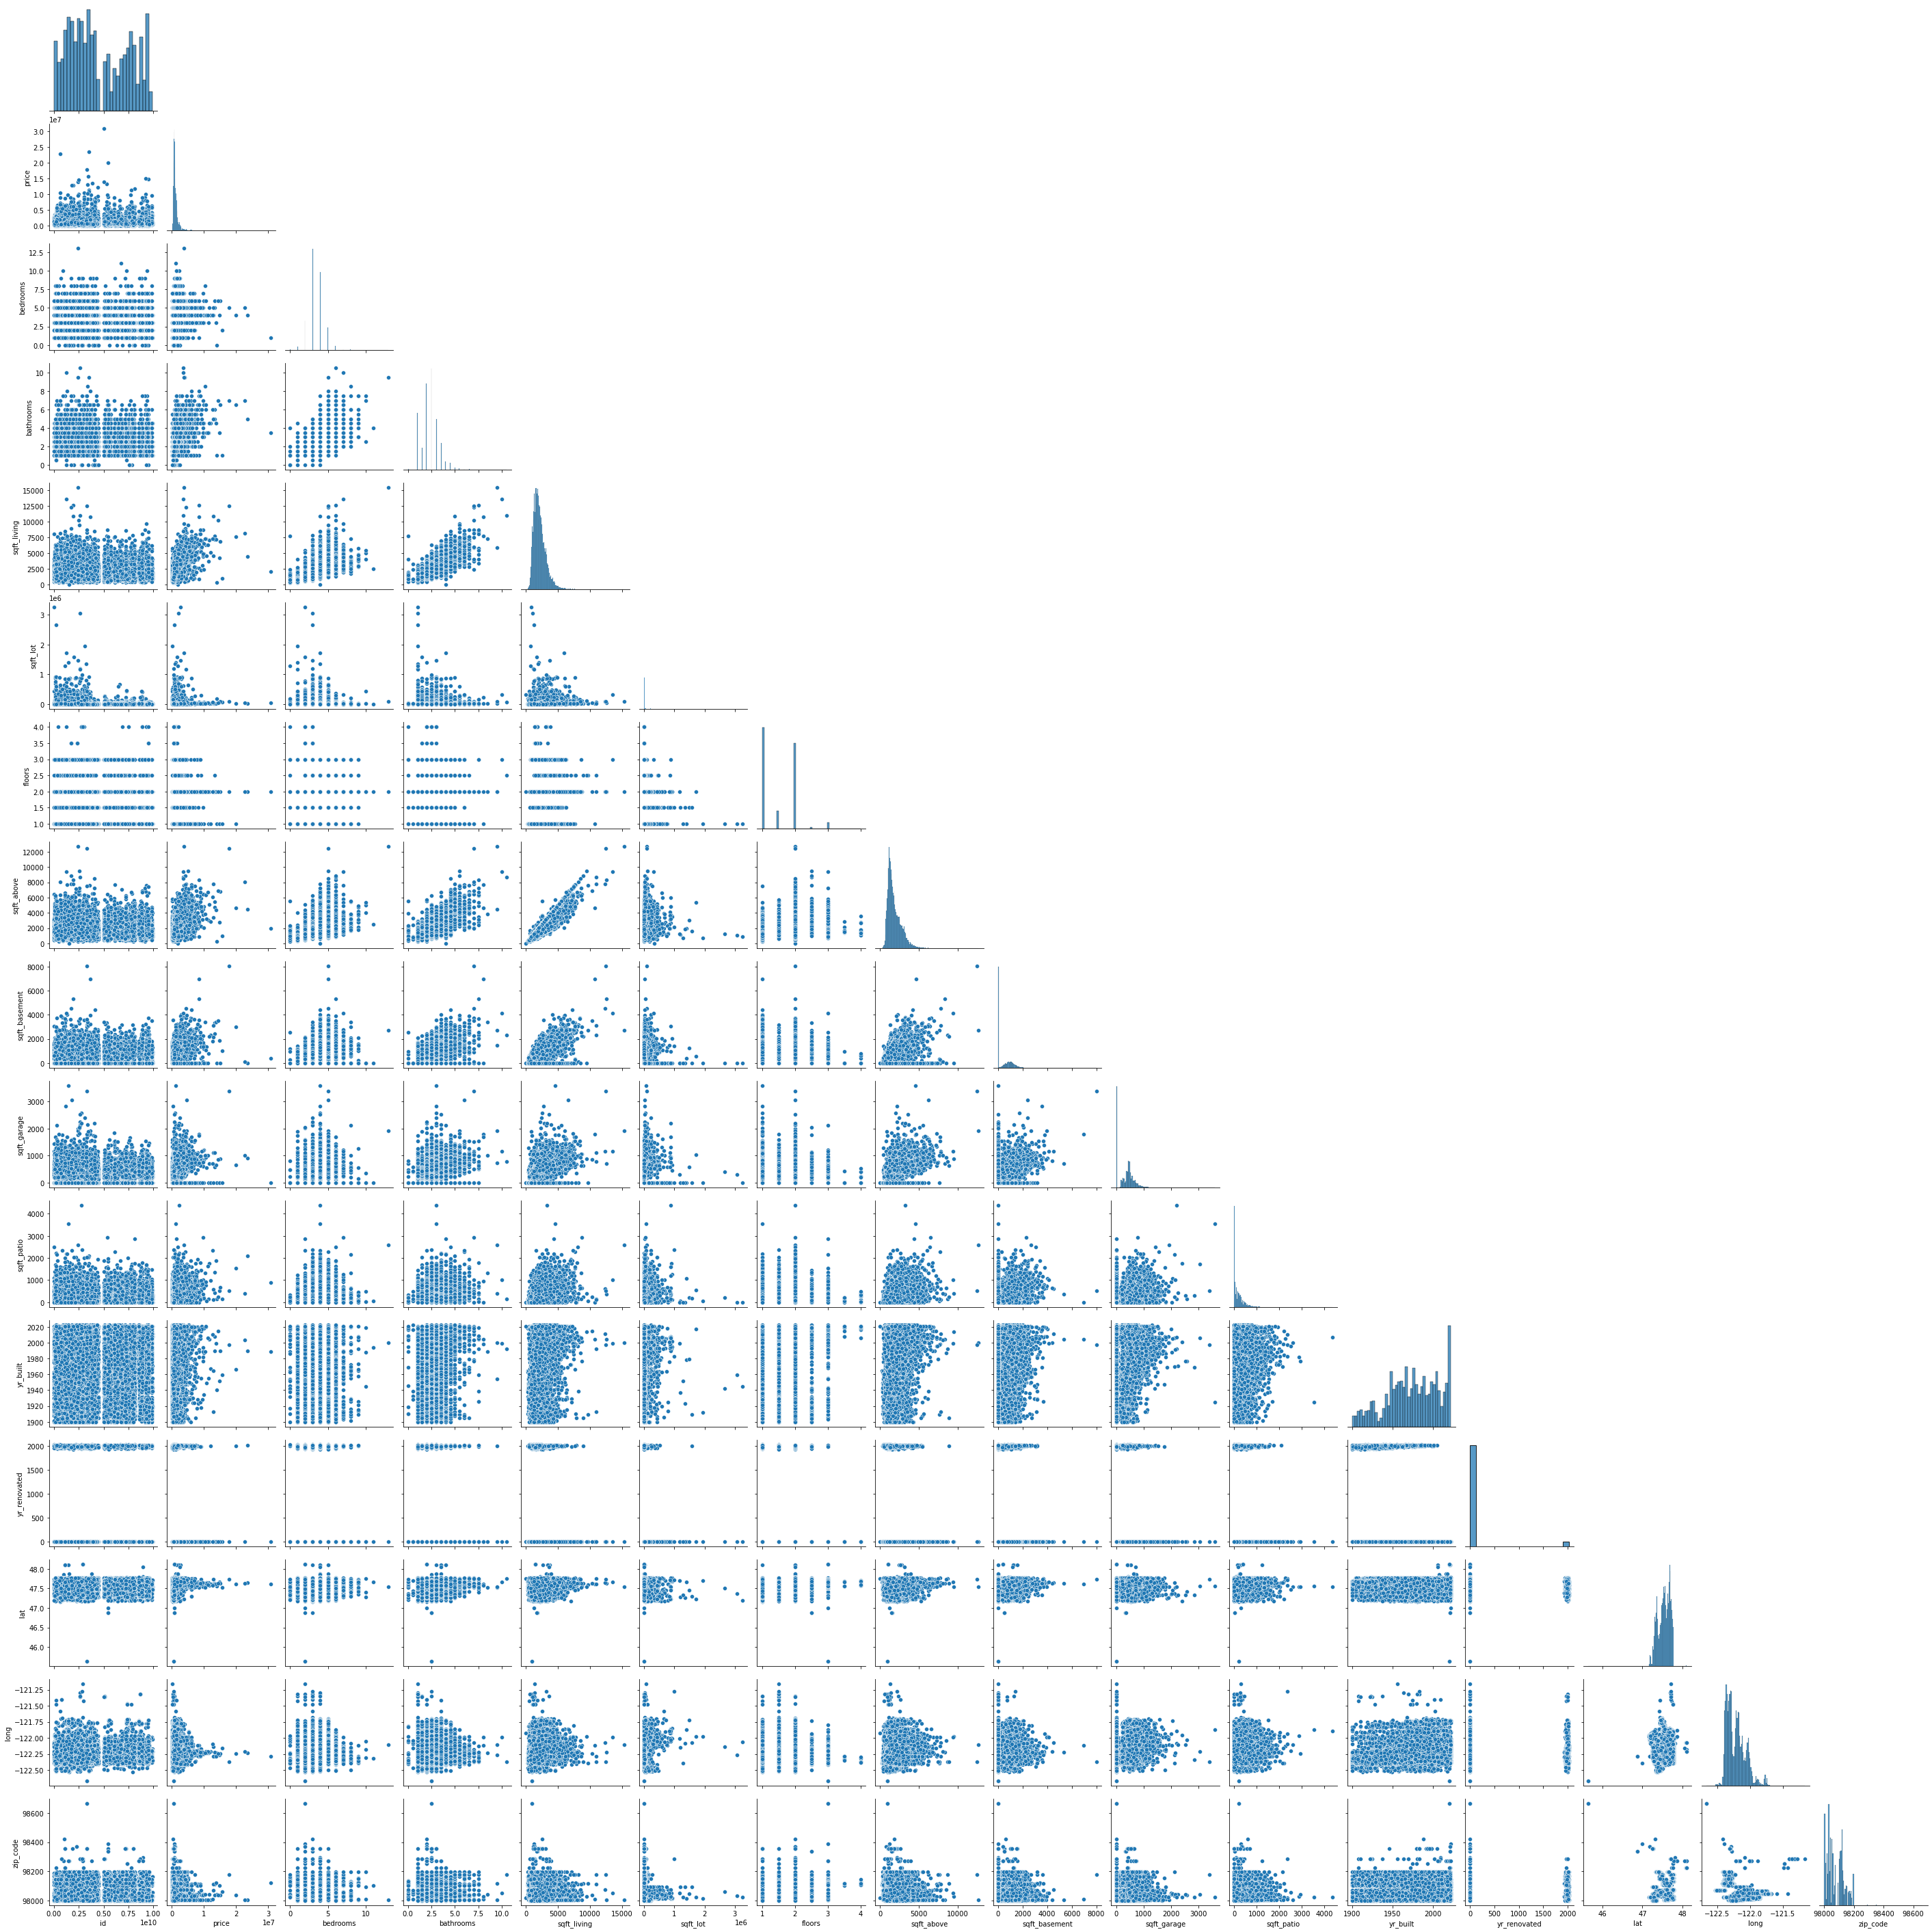

In [308]:
sns.pairplot(realkcdf, corner = True)

<AxesSubplot:>

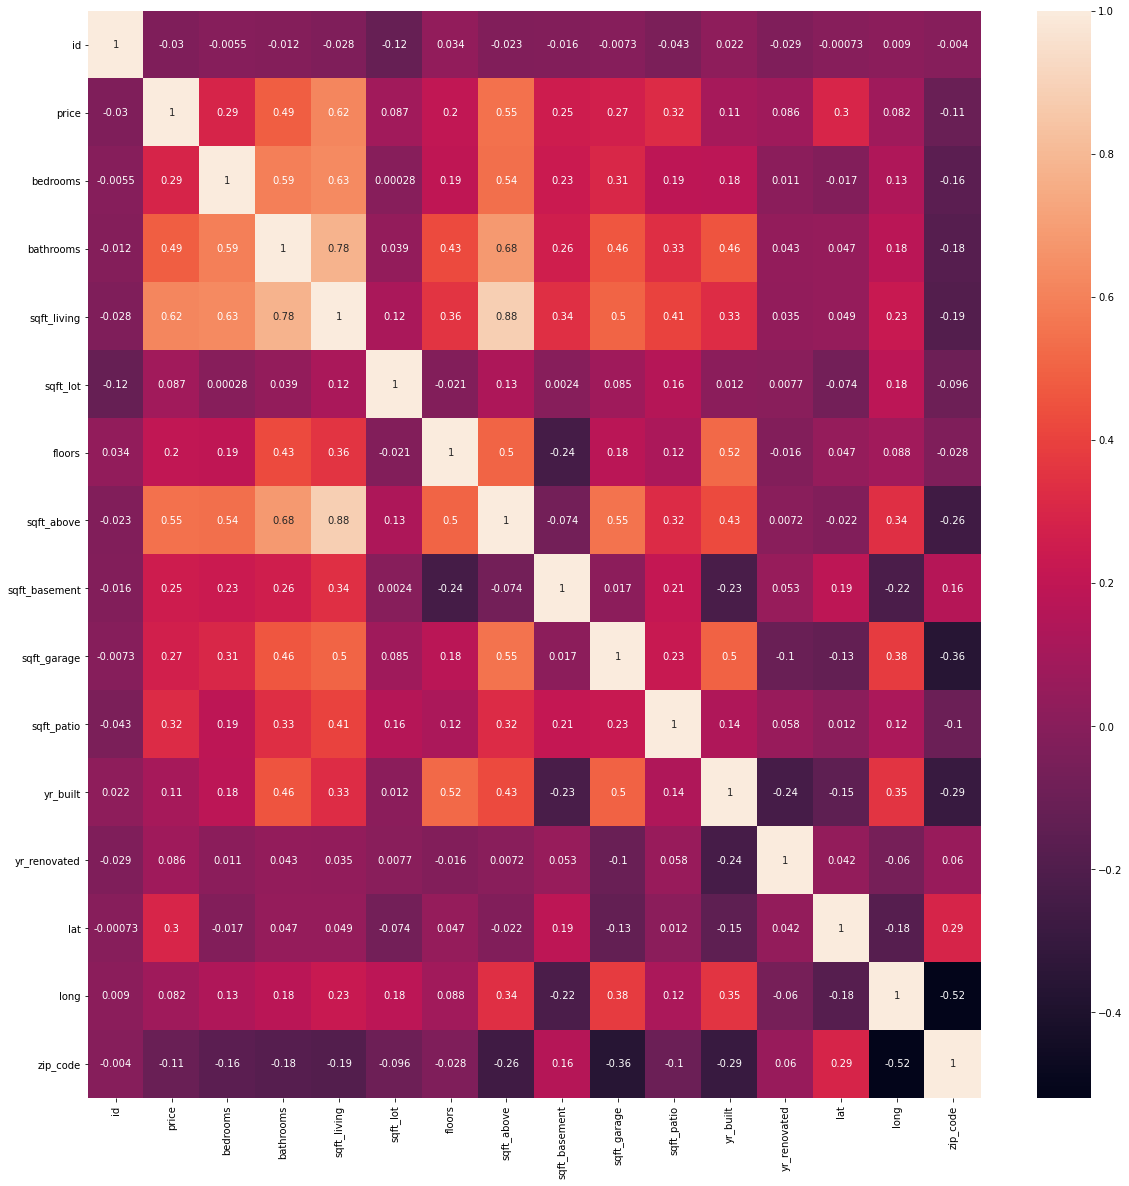

In [307]:
plt.figure(figsize = (20,20))
sns.heatmap(realkcdf.corr(), annot = True)

In [224]:
realkcdf['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [225]:
realkcdf['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [226]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [227]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [228]:
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [272]:
new_kcdf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,address,lat,long,zip_code,grade,condition,view
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,5.0,3.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,5.0,2.0,2.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,5.0,2.0,2.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,7.0,2.0,2.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29195,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,6.0,3.0,0.0
29196,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,5.0,2.0,1.0
29197,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,5.0,2.0,0.0
29198,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,6.0,2.0,0.0


In [273]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [274]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code', 'nuisance']

In [275]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [276]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [277]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

In [278]:
cleandf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,x4_98288,x4_98296,x4_98338,x4_98354,x4_98372,x4_98387,x4_98422,x4_98663,x5_NO,x5_YES
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29195,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29196,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29197,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29198,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [293]:
lr = LinearRegression()

In [294]:
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [295]:
lr.fit(X_train, y_train)

LinearRegression()

In [296]:
lr.score(X_train, y_train)

0.6514502018326451

In [297]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([ 378965.15748736, 1277017.01447928, 1406712.09905455,
       1756800.11244002,  346726.01206645,  504872.17605272,
        948699.09802112,  687058.48368168,  847481.03922248,
        815535.34002426])

In [298]:
lr.score(X_train,y_train)

0.6514502018326451

In [299]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

262185.3549535815

In [300]:
ss = StandardScaler()

In [301]:
ss.fit(X_train)

StandardScaler()

In [302]:
X_standardized_train = ss.fit_transform(X_train)

In [303]:
X_standardized_test = ss.transform(X_test)

In [304]:

lr.fit(X_standardized_train, y_train)

lr.score(X_standardized_train, y_train)

0.6514016467005743

In [305]:
lr.score(X_standardized_test, y_test)

-9.79085613841097e+19

In [306]:
mean_absolute_error(y_pred, y_test)

262185.3549535815

In [310]:
x = cleandf.drop(columns = ['price', 'id','index', 'address'])
y = cleandf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

In [312]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     492.5
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        10:40:19   Log-Likelihood:            -4.2592e+05
No. Observations:               29200   AIC:                         8.521e+05
Df Residuals:                   29085   BIC:                         8.530e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.611e+07    7.1e+06     -7.898      0.000      -7e+07   -4.22e+07
bedrooms              -6.676e+04   4379.860    -15.243      0.000   -7.53e+04   -5.82e+04
bathrooms              5.046e+04   6352.198      7.944      0.000     3.8e+04    6.29e+04
sqft_living             147.6445     14.495     10.186      0.000     119.234     176.055
sqft_lot                  0.5680      0.056     10.139      0.000       0.458       0.678
floors                 -1.37e+05   8806.690    -15.562      0.000   -1.54e+05    -1.2e+05
sqft_above              288.3418     14.767     19.526      0.000     259.398     317.286
sqft_basement            59.5362     11.091      5.368      0.000      37.797      81.275
sqft_garage             -22.4382     15.969     -1.405      0.160     -53.738       8.861
sqft_patio               78.5728     14.432      5.444      0.000      50.285     106.860
yr_built               -737.0563    165.002     -4.467      0.000   -1060.468    -413.645
lat                    2.549e+05   1.82e+05      1.404      0.160   -1.01e+05    6.11e+05
long                  -1.248e+06   1.61e+05     -7.764      0.000   -1.56e+06   -9.33e+05
grade                  1.094e+05   5006.546     21.850      0.000    9.96e+04    1.19e+05
condition              4.577e+04   4865.777      9.407      0.000    3.62e+04    5.53e+04
view                   9.669e+04   4363.198     22.160      0.000    8.81e+04    1.05e+05
x0_NO                 -2.857e+07   3.55e+06     -8.043      0.000   -3.55e+07   -2.16e+07
x0_YES                -2.753e+07   3.55e+06     -7.753      0.000   -3.45e+07   -2.06e+07
x1_NO                 -2.807e+07   3.55e+06     -7.903      0.000    -3.5e+07   -2.11e+07
x1_YES                -2.804e+07   3.55e+06     -7.893      0.000    -3.5e+07   -2.11e+07
x2_Electricity        -8.029e+06   1.02e+06     -7.902      0.000      -1e+07   -6.04e+06
x2_Electricity/Solar  -8.088e+06   1.02e+06     -7.949      0.000   -1.01e+07   -6.09e+06
x2_Gas                -8.048e+06   1.02e+06     -7.921      0.000      -1e+07   -6.06e+06
x2_Gas/Solar          -7.898e+06   1.02e+06     -7.769      0.000   -9.89e+06   -5.91e+06
x2_Oil                -8.074e+06   1.02e+06     -7.946      0.000   -1.01e+07   -6.08e+06
x2_Oil/Solar          -7.988e+06   1.04e+06     -7.675      0.000      -1e+07   -5.95e+06
x2_Other               -7.98e+06   1.02e+06     -7.833      0.000   -9.98e+06   -5.98e+06
x3_PRIVATE            -1.396e+07   1.78e+06     -7.855      0.000   -1.74e+07   -1.05e+07
x3_PRIVATE RESTRICTED -1.425e+07   1.79e+06     -7.977      0.000   -1.78e+07   -1.08e+07
x3_PUBLIC             -1.391e+07   1.78e+06     -7.823      0.000   -1.74e+07   -1.04e+07
x3_PUBLIC RESTRICTED  -1.398e+07    1.8e+06     -7.758      0.000   -1.75e+07   -1.04e+07
x4_98001              -